In [170]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
import json

plt.rcParams["figure.figsize"] = 12,8
pd.options.display.float_format = '{:,.3f}'.format

In [171]:
palettes = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

## Загрузка данных о трендовых видео российского Ютуба

In [172]:
ru = pd.read_csv(r'C:\Users\Максим\Desktop\Аналитика данных\Datasets\RU_youtube_trending_data.csv')

In [173]:
ru.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,e_Z6upbeYuc,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**,2020-08-12T09:00:16Z,UC2tsySbe9TNrI-xh2lximHA,A4,24,2020-08-12T00:00:00Z,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**...,5173063,1052986,29927,63557,https://i.ytimg.com/vi/e_Z6upbeYuc/default.jpg,False,False,Новые кроссовки Reebok Classic Leather Legacy ...
1,X5j69JMlbwM,DAVA & Филипп Киркоров – РОЛЕКС (Премьера клип...,2020-08-12T09:00:10Z,UCbh7BxJWCMnWLwJ-traa6Wg,DAVA,22,2020-08-12T00:00:00Z,РОЛЕКС|DAVA|Киркоров|2020|музыка в машину|музы...,636749,58770,28133,5051,https://i.ytimg.com/vi/X5j69JMlbwM/default.jpg,False,False,#Dava #ФилиппКиркоров #Ролекс #Music С огромны...
2,FzJjlIzZlVc,Как Я ЧУТЬ НЕ УМЕР 2 (анимация),2020-08-12T10:00:02Z,UCLNrn6a4Co8D6H7jRZtNPcA,X2DED,1,2020-08-12T00:00:00Z,как я чуть не умер|чуть не умер|история из жиз...,359904,45025,438,2793,https://i.ytimg.com/vi/FzJjlIzZlVc/default.jpg,False,False,Это история анимация о том как я чуть не умер ...
3,oD3FOzQDuy0,ВЫРВАЛАСЬ и УЛЕТЕЛА!!! / ТУРИЗМ 2020,2020-08-12T09:00:50Z,UCC83eap-hc6uFQHRJ2F2LNg,TheKateClapp,22,2020-08-12T00:00:00Z,катя|клэп|катюша|kate|clapp|детское|школа|смеш...,355978,64073,585,2771,https://i.ytimg.com/vi/oD3FOzQDuy0/default.jpg,False,False,"Вырвалась из КАРАНТИНА! Лучшее, что случилось ..."
4,26gteilUAuQ,Полный контакт / Соловьёв LIVE / 12 августа 20...,2020-08-12T08:43:30Z,UCQ4YOFsXjG9eXWZ6uLj2t2A,Соловьёв LIVE,25,2020-08-12T00:00:00Z,Соловьев|Владимир Соловьев|Соловьев live|solov...,428221,19329,5126,1034,https://i.ytimg.com/vi/26gteilUAuQ/default.jpg,False,False,🌞 Доброе утро!📻 Устанавливаем «Полный контакт»...


## Предобработка

In [174]:
video_id = ru['video_id']
channel_id = ru['channelId']
ru = ru.drop(columns=['video_id', 'channelId'], axis=1)

In [175]:
# Чтение файла с категориями

with open(r'C:\Users\Максим\Desktop\Аналитика данных\Datasets\RU_category_id.json') as f:
    categories = json.load(f)["items"]
cat_dict = {}
category=[]
for cat in categories:
    category.append([cat["id"],cat["snippet"]["title"]])

In [176]:
category_df = pd.DataFrame(category, columns=['categoryId','category'])
category_df.head()

,categoryId,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [177]:
category_df.dtypes

categoryId    object
category      object
dtype: object

In [178]:
category_df['categoryId'] = category_df['categoryId'].astype(int)

In [179]:
# Добавим категорию в основной датафрейм
# Не нужно запускать эту ячейку более 1 раза

ru = pd.merge(ru, category_df, on='categoryId')

In [180]:
ru.head()

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
0,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**,2020-08-12T09:00:16Z,A4,24,2020-08-12T00:00:00Z,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**...,5173063,1052986,29927,63557,https://i.ytimg.com/vi/e_Z6upbeYuc/default.jpg,False,False,Новые кроссовки Reebok Classic Leather Legacy ...,Entertainment
1,ЕСЛИ ТЫ УВИДИШЬ ПРИЗРАК ДОМА ТО СРАЗУ БЕГИ ! М...,2020-08-12T07:00:15Z,АлоЯ Вера,24,2020-08-12T00:00:00Z,мистический квест|квест|алоя вера|алое вера|са...,249438,17533,1132,3309,https://i.ytimg.com/vi/szS499UV9kw/default.jpg,False,False,СЛЕДУЮЩЕЕ ВИДЕО - https://youtu.be/9v6lANyHbes...,Entertainment
2,Я ВЕРНУЛСЯ В 1й КЛАСС НА ДЕНЬ,2020-08-11T11:14:26Z,HiMan,24,2020-08-12T00:00:00Z,школа|один день|день|один день в школе|отучилс...,3212662,395568,8817,26083,https://i.ytimg.com/vi/7casLyVjv1I/default.jpg,False,False,Буду рад твоей подписке(мой канал)! ☛ https://...,Entertainment
3,Comedy Club - Случай в самолёте,2020-08-11T07:43:36Z,Телеканал ТНТ,24,2020-08-12T00:00:00Z,ТНТ|Телеканал ТНТ|юмор|камеди|кламеди клаб|тим...,1063252,33720,2637,839,https://i.ytimg.com/vi/3nfadIylKwc/default.jpg,False,False,"Что может произойти в салоне самолета, если по...",Entertainment
4,ЕЩЕ 9 ЛАЙФХАКОВ ИЗ ТИК ТОКА !),2020-08-11T16:13:54Z,GoldenBurst,24,2020-08-12T00:00:00Z,лайфхаки|life hack|советы|тикток|лайфхаки из т...,289227,27700,776,1377,https://i.ytimg.com/vi/0mCtgyAzIDM/default.jpg,False,False,Мы снова просмотрели весь тикток и решили отоб...,Entertainment


In [181]:
ru.shape

(83636, 15)

In [182]:
# Проверим, есть ли пропуски

ru.isnull().sum()

title                   0
publishedAt             0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          1755
category                0
dtype: int64

In [183]:
# Есть пропуски в описании

ru = ru.fillna('None')

In [184]:
# Теперь пропусков нет

ru.isnull().sum().sum()

0

In [185]:
# Посмотрим наличие дубликатов

ru.duplicated('title').sum()

33939

In [186]:
ru = ru.drop_duplicates(subset=['title'])

In [187]:
ru.duplicated('title').sum()

0

In [188]:
ru.shape

(49697, 15)

In [189]:
print(f'Наблюдается {ru["channelTitle"].nunique()} уникальных каналов')
print(f'Наблюдается {ru["category"].nunique()} уникальных категорий каналов')

Наблюдается 5102 уникальных каналов
Наблюдается 14 уникальных категорий каналов


In [190]:
ru.head(2)

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
0,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**,2020-08-12T09:00:16Z,A4,24,2020-08-12T00:00:00Z,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**...,5173063,1052986,29927,63557,https://i.ytimg.com/vi/e_Z6upbeYuc/default.jpg,False,False,Новые кроссовки Reebok Classic Leather Legacy ...,Entertainment
1,ЕСЛИ ТЫ УВИДИШЬ ПРИЗРАК ДОМА ТО СРАЗУ БЕГИ ! М...,2020-08-12T07:00:15Z,АлоЯ Вера,24,2020-08-12T00:00:00Z,мистический квест|квест|алоя вера|алое вера|са...,249438,17533,1132,3309,https://i.ytimg.com/vi/szS499UV9kw/default.jpg,False,False,СЛЕДУЮЩЕЕ ВИДЕО - https://youtu.be/9v6lANyHbes...,Entertainment


In [191]:
# Переводим столбцы с данными о дате в соответствующий формат

ru['trending_date'] = pd.to_datetime(ru['trending_date']) 
ru['publishedAt'] = pd.to_datetime(ru['publishedAt'])

In [192]:
# Отношение лайков к дизлайкам

ru['like_ratio'] = ru['likes']/(ru['likes'] + ru['dislikes'])

In [193]:
# Отношение лайков к просмотрам

ru['view_likes_ratio'] = ru['likes']/ru['view_count']

In [194]:
# Отношение суммы лайков и дизлайков к просмотрам

ru['likes_activity'] = (ru['likes']+ru['dislikes'])/ru['view_count']

In [195]:
# Отношение кол-ва комментариев к просмотрам

ru['comment_activity'] = ru['comment_count']/ru['view_count']

In [196]:
ru.head(5)

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category,like_ratio,view_likes_ratio,likes_activity,comment_activity
0,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**,2020-08-12 09:00:16+00:00,A4,24,2020-08-12 00:00:00+00:00,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**...,5173063,1052986,29927,63557,https://i.ytimg.com/vi/e_Z6upbeYuc/default.jpg,False,False,Новые кроссовки Reebok Classic Leather Legacy ...,Entertainment,0.972,0.204,0.209,0.012
1,ЕСЛИ ТЫ УВИДИШЬ ПРИЗРАК ДОМА ТО СРАЗУ БЕГИ ! М...,2020-08-12 07:00:15+00:00,АлоЯ Вера,24,2020-08-12 00:00:00+00:00,мистический квест|квест|алоя вера|алое вера|са...,249438,17533,1132,3309,https://i.ytimg.com/vi/szS499UV9kw/default.jpg,False,False,СЛЕДУЮЩЕЕ ВИДЕО - https://youtu.be/9v6lANyHbes...,Entertainment,0.939,0.070,0.075,0.013
2,Я ВЕРНУЛСЯ В 1й КЛАСС НА ДЕНЬ,2020-08-11 11:14:26+00:00,HiMan,24,2020-08-12 00:00:00+00:00,школа|один день|день|один день в школе|отучилс...,3212662,395568,8817,26083,https://i.ytimg.com/vi/7casLyVjv1I/default.jpg,False,False,Буду рад твоей подписке(мой канал)! ☛ https://...,Entertainment,0.978,0.123,0.126,0.008
3,Comedy Club - Случай в самолёте,2020-08-11 07:43:36+00:00,Телеканал ТНТ,24,2020-08-12 00:00:00+00:00,ТНТ|Телеканал ТНТ|юмор|камеди|кламеди клаб|тим...,1063252,33720,2637,839,https://i.ytimg.com/vi/3nfadIylKwc/default.jpg,False,False,"Что может произойти в салоне самолета, если по...",Entertainment,0.927,0.032,0.034,0.001
4,ЕЩЕ 9 ЛАЙФХАКОВ ИЗ ТИК ТОКА !),2020-08-11 16:13:54+00:00,GoldenBurst,24,2020-08-12 00:00:00+00:00,лайфхаки|life hack|советы|тикток|лайфхаки из т...,289227,27700,776,1377,https://i.ytimg.com/vi/0mCtgyAzIDM/default.jpg,False,False,Мы снова просмотрели весь тикток и решили отоб...,Entertainment,0.973,0.096,0.098,0.005


In [197]:
ru = ru.drop(ru[ru['view_count']==0].index)

In [198]:
ru.describe()

,categoryId,view_count,likes,dislikes,comment_count,like_ratio,view_likes_ratio,likes_activity,comment_activity
count,"49,686.000","49,686.000","49,686.000","49,686.000","49,686.000","49,188.000","49,686.000","49,686.000","49,686.000"
mean,18.857,"404,055.251","33,011.887",803.385,"3,275.206",0.949,0.075,0.077,0.007
std,8.185,"1,346,125.303","142,731.519","3,628.809","30,300.771",0.070,0.057,0.058,0.009
min,1.000,"13,570.000",0.000,0.000,0.000,0.007,0.000,0.000,0.000
25%,17.000,"66,430.500","3,163.250",102.000,273.000,0.944,0.027,0.029,0.003
50%,22.000,"145,874.500","7,753.500",243.000,735.000,0.972,0.065,0.068,0.005
75%,24.000,"334,096.250","20,641.750",625.000,"1,858.000",0.985,0.109,0.111,0.009
max,28.000,"74,433,564.000","7,110,506.000","471,525.000","3,403,157.000",1.000,0.573,0.574,0.455


In [199]:
ru['publishedAt'].min()

Timestamp('2020-08-09 12:10:29+0000', tz='UTC')

In [200]:
ru['publishedAt'].max()

Timestamp('2021-10-13 08:33:32+0000', tz='UTC')

Самое раннее видео в этих данных имеет дату 9 августа 2020 года. 

In [201]:
ru['month'] = ru['publishedAt'].dt.month

In [202]:
ru['year'] = ru['publishedAt'].dt.year

In [203]:
alphabet = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
kz_symbols = 'ӘҒҚҢӨҰ'

In [204]:
# Функция, определяющая, является ли видеоролик российским и не является ли казахским

def is_russian(x):
    rus_counter = 0
    kz_counter = 0
    for i in x:
        if i.lower() in alphabet:
            rus_counter += 1
        if i.upper() in kz_symbols:
            kz_counter += 1
    if rus_counter/len(x) > 0.2 and kz_counter==0:    
        return 'yes'
    else:
        return 'no'

In [205]:
ru['is_russian'] = ru['title'].apply(is_russian)

In [206]:
# Функция, считающая кол-во букв в названии видео

def letters_count(x):
    counter = 0
    for i in x:
        if i.isalpha()==True:
            counter += 1
    return counter

In [207]:
ru['title_length'] = ru['title'].apply(letters_count)

In [208]:
# Функция, считающая кол-во заглавных букв в названии видео

def upper_count(x):
    counter = 0
    for i in x:
        if i == i.upper() and i.isalpha()==True:
            counter += 1
    return counter

In [209]:
ru['upper_letters'] = ru['title'].apply(upper_count)

In [210]:
# Отношение кол-ва заглавных букв ко всем. Это нужно, чтобы выяснить, насколько эффективны кричащие заголовки

ru['upper_letters_part'] = ru['upper_letters']/ru['title_length']

In [211]:
ru.head(3)

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category,like_ratio,view_likes_ratio,likes_activity,comment_activity,month,year,is_russian,title_length,upper_letters,upper_letters_part
0,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**,2020-08-12 09:00:16+00:00,A4,24,2020-08-12 00:00:00+00:00,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**...,5173063,1052986,29927,63557,https://i.ytimg.com/vi/e_Z6upbeYuc/default.jpg,False,False,Новые кроссовки Reebok Classic Leather Legacy ...,Entertainment,0.972,0.204,0.209,0.012,8,2020,yes,35,18,0.514
1,ЕСЛИ ТЫ УВИДИШЬ ПРИЗРАК ДОМА ТО СРАЗУ БЕГИ ! М...,2020-08-12 07:00:15+00:00,АлоЯ Вера,24,2020-08-12 00:00:00+00:00,мистический квест|квест|алоя вера|алое вера|са...,249438,17533,1132,3309,https://i.ytimg.com/vi/szS499UV9kw/default.jpg,False,False,СЛЕДУЮЩЕЕ ВИДЕО - https://youtu.be/9v6lANyHbes...,Entertainment,0.939,0.070,0.075,0.013,8,2020,yes,51,51,1.000
2,Я ВЕРНУЛСЯ В 1й КЛАСС НА ДЕНЬ,2020-08-11 11:14:26+00:00,HiMan,24,2020-08-12 00:00:00+00:00,школа|один день|день|один день в школе|отучилс...,3212662,395568,8817,26083,https://i.ytimg.com/vi/7casLyVjv1I/default.jpg,False,False,Буду рад твоей подписке(мой канал)! ☛ https://...,Entertainment,0.978,0.123,0.126,0.008,8,2020,yes,22,21,0.955


## Анализ данных

Медиана просмотров: 145874
Среднее кол-во просмотров: 404055
Медиана комментариев: 735
Среднее кол-во комментариев: 3275


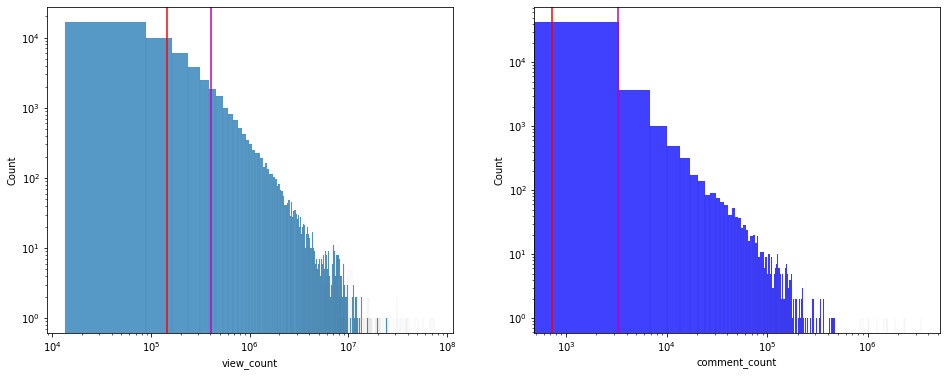

In [212]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1 = sns.histplot(data=ru, x='view_count', bins=1000, ax=ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.axvline(ru['view_count'].median(), color='r', label=f'Медиана просмотров: {round(ru["view_count"].median())}')
ax1.axvline(ru['view_count'].mean(), color='m', label=f'Среднее кол-во просмотров: {round(ru["view_count"].mean())}')

ax2 = sns.histplot(data=ru, x='comment_count', bins=1000, ax=ax2, color='b')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.axvline(ru['comment_count'].median(), color='r', label=f'Медиана комментариев: {round(ru["comment_count"].median())}')
ax2.axvline(ru['comment_count'].mean(), color='m', label=f'Среднее кол-во комментариев: {round(ru["comment_count"].mean())}');

print(f'Медиана просмотров: {round(ru["view_count"].median())}')
print(f'Среднее кол-во просмотров: {round(ru["view_count"].mean())}')
print(f'Медиана комментариев: {round(ru["comment_count"].median())}')
print(f'Среднее кол-во комментариев: {round(ru["comment_count"].mean())}')

Медианное количество просмотров трендовых видео приблизительно равно 200 000. При этом среднее кол-во просмотров составляет примерно 700 000. Это говорит о значительном перекосе данных. С количеством комментариев аналогично.

Медиана лайков: 7754
Среднее кол-во лайков: 33012
Медиана дизлайков: 243
Среднее кол-во дизлайков: 803


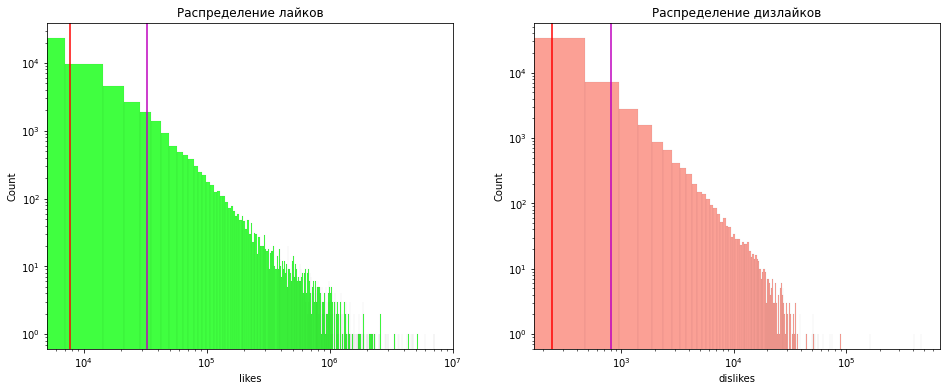

In [213]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1 = sns.histplot(data=ru, x='likes', bins=1000, color='lime', ax=ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.axvline(ru['likes'].median(), color='r')
ax1.axvline(ru['likes'].mean(), color='m')
ax1.set_title('Распределение лайков')

ax2 = sns.histplot(data=ru, x='dislikes', bins=1000, color='salmon', ax=ax2)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.axvline(ru['dislikes'].median(), color='r')
ax2.axvline(ru['dislikes'].mean(), color='m')
ax2.set_title('Распределение дизлайков');

print(f'Медиана лайков: {round(ru["likes"].median())}')
print(f'Среднее кол-во лайков: {round(ru["likes"].mean())}')
print(f'Медиана дизлайков: {round(ru["dislikes"].median())}')
print(f'Среднее кол-во дизлайков: {round(ru["dislikes"].mean())}')

Перекос данных так же ярко выражен. В подобных случаях медиана дает более ясную оценку.

Медиана отношений "лайки/дизлайки": 0.972
Среднее отношение "лайки/дизлайки": 0.949
Медиана отношений "лайки/просмотры": 0.065
Среднее отношение "лайки/просмотры": 0.075


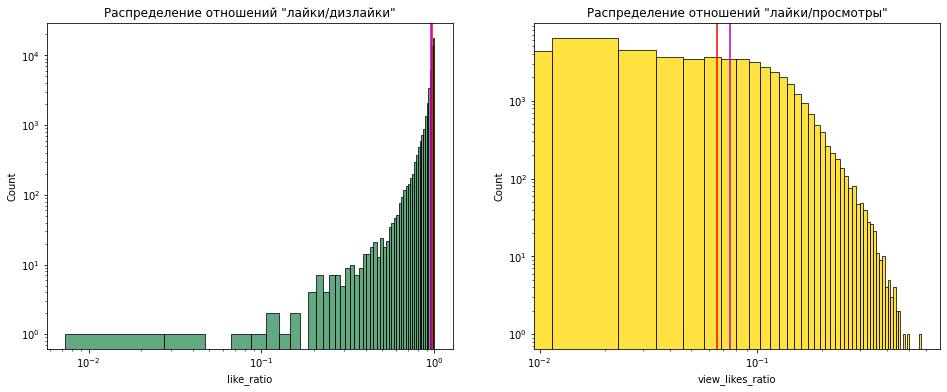

In [214]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1 = sns.histplot(data=ru, x='like_ratio', bins=50, color='seagreen', ax=ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.axvline(ru['like_ratio'].median(), color='r')
ax1.axvline(ru['like_ratio'].mean(), color='m')
ax1.set_title('Распределение отношений "лайки/дизлайки"')

ax2 = sns.histplot(data=ru, x='view_likes_ratio', bins=50, color='gold', ax=ax2)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.axvline(ru['view_likes_ratio'].median(), color='r')
ax2.axvline(ru['view_likes_ratio'].mean(), color='m')
ax2.set_title('Распределение отношений "лайки/просмотры"');

print(f'Медиана отношений "лайки/дизлайки": {round(ru["like_ratio"].median(), 3)}')
print(f'Среднее отношение "лайки/дизлайки": {round(ru["like_ratio"].mean(), 3)}')
print(f'Медиана отношений "лайки/просмотры": {round(ru["view_likes_ratio"].median(), 3)}')
print(f'Среднее отношение "лайки/просмотры": {round(ru["view_likes_ratio"].mean(), 3)}')

Большинство видео имеют очень высокое соотношение лайков к дизлайкам, и это довольно интересно. Какую бы ерунду не снимали, многим зрителям трендов это нравится. В идеале, для более объективной оценки видеороликов нужно проводить специальное исследование с тысячами людей из разных социальных групп. К слову, данных о возрастной категории зрителей роликов тут не предоставлено.

In [215]:
# Отношение суммы лайков и дизлайков к просмотрам
# Отношение кол-ва комментариев к просмотрам

Медиана отношений суммы лайков и дизлайков к просмотрам: 0.068
Среднее отношение суммы лайков и дизлайков к просмотрам: 0.077
Медиана отношений кол-ва комментариев к просмотрам: 0.005
Среднее отношение кол-ва комментариев к просмотрам: 0.007


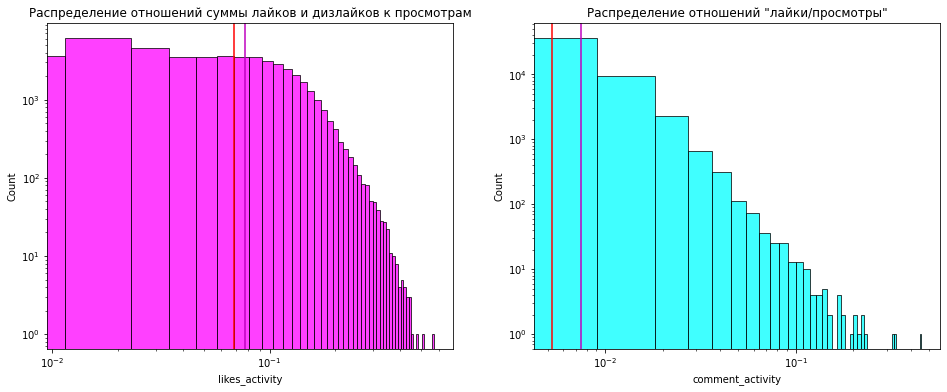

In [216]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1 = sns.histplot(data=ru, x='likes_activity', bins=50, color='fuchsia', ax=ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.axvline(ru['likes_activity'].median(), color='r')
ax1.axvline(ru['likes_activity'].mean(), color='m')
ax1.set_title('Распределение отношений суммы лайков и дизлайков к просмотрам')

ax2 = sns.histplot(data=ru, x='comment_activity', bins=50, color='cyan', ax=ax2)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.axvline(ru['comment_activity'].median(), color='r')
ax2.axvline(ru['comment_activity'].mean(), color='m')
ax2.set_title('Распределение отношений "лайки/просмотры"');

print(f'Медиана отношений суммы лайков и дизлайков к просмотрам: {round(ru["likes_activity"].median(), 3)}')
print(f'Среднее отношение суммы лайков и дизлайков к просмотрам: {round(ru["likes_activity"].mean(), 3)}')
print(f'Медиана отношений кол-ва комментариев к просмотрам: {round(ru["comment_activity"].median(), 3)}')
print(f'Среднее отношение кол-ва комментариев к просмотрам: {round(ru["comment_activity"].mean(), 3)}')

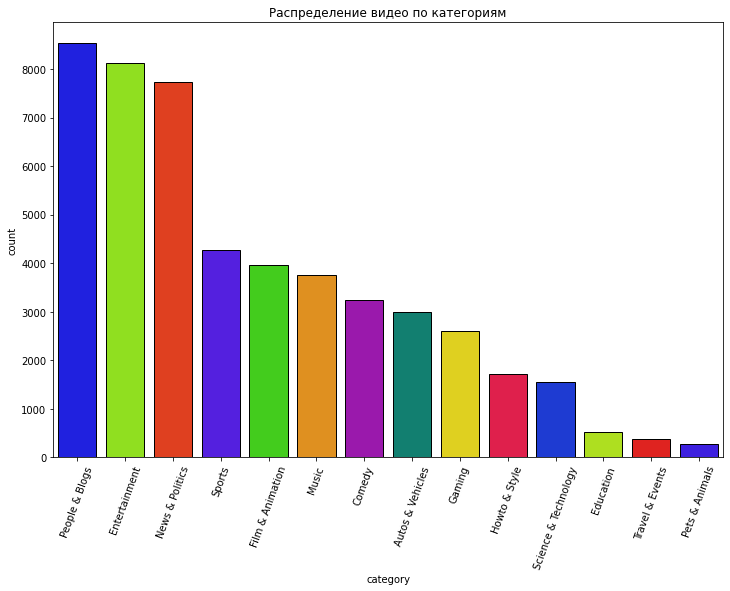

In [217]:
sns.countplot(ru['category'], palette='prism', ec='k', order = ru['category'].value_counts().index)
plt.title('Распределение видео по категориям')
plt.xticks(rotation=70);

Чаще всего в тренды попадают видео категорий: люди и блоги, развлекательные, а также политика и новости. Реже всего в тренды попадают образовательные ролики, ролики о путешествиях и животных.

Доля российских видеороликов: 84.36%
Доля зарубежных видеороликов: 15.64%


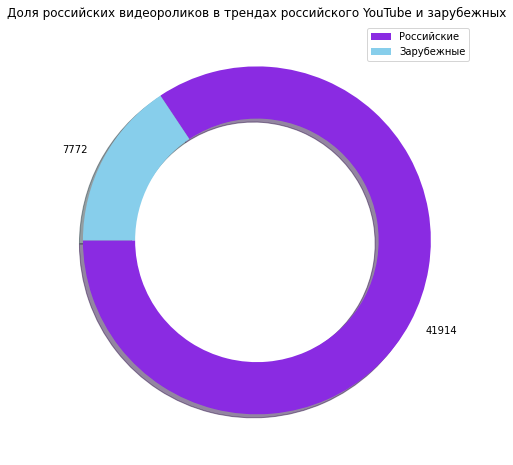

In [218]:
labels = ru['is_russian'].value_counts()
plt.pie(ru['is_russian'].value_counts(), labels = labels, labeldistance = 1.1,
wedgeprops = dict(width = 0.3), shadow = True, startangle = 180, colors=['blueviolet', 'skyblue'])
plt.title('Доля российских видеороликов в трендах российского YouTube и зарубежных')
plt.legend(['Российские', 'Зарубежные']);

print(f'Доля российских видеороликов: {round(100*ru["is_russian"].value_counts()[0]/len(ru), 2)}%')
print(f'Доля зарубежных видеороликов: {round(100*ru["is_russian"].value_counts()[1]/len(ru), 2)}%')

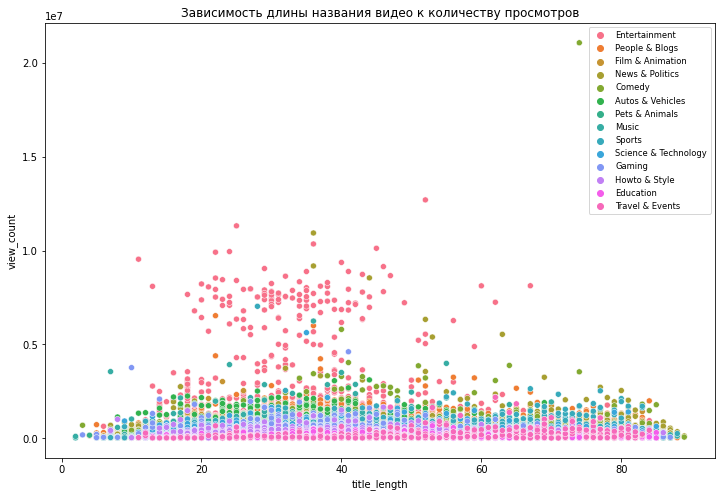

In [219]:
# Посмотрим, есть ли связь между длиной названия видео и его просматриваемостью. В учет берем только российские ролики

sns.scatterplot(data=ru[ru['is_russian']=='yes'], x='title_length', y='view_count', hue='category')
plt.title('Зависимость длины названия видео к количеству просмотров')
plt.legend(fontsize='small');

In [220]:
ru[ru['is_russian']=='yes'].corr()['view_count'].sort_values(ascending=False)

view_count            1.000
likes                 0.853
dislikes              0.684
comment_count         0.663
categoryId            0.054
upper_letters_part    0.033
view_likes_ratio      0.019
likes_activity        0.018
like_ratio            0.018
month                 0.014
comment_activity     -0.000
year                 -0.003
upper_letters        -0.011
ratings_disabled     -0.020
comments_disabled    -0.021
title_length         -0.064
Name: view_count, dtype: float64

Как видно, связи между этими величинами практически нет, она даже чуточку отрицательная. Кстати, между долей заглавных букв и количеством просмотров также нет четкой связи. Видимо, дело не в количестве букв, а в самих названиях видео. Я слышал, что кликбейтные названия работают, на этот счет даже проводились исслеования.

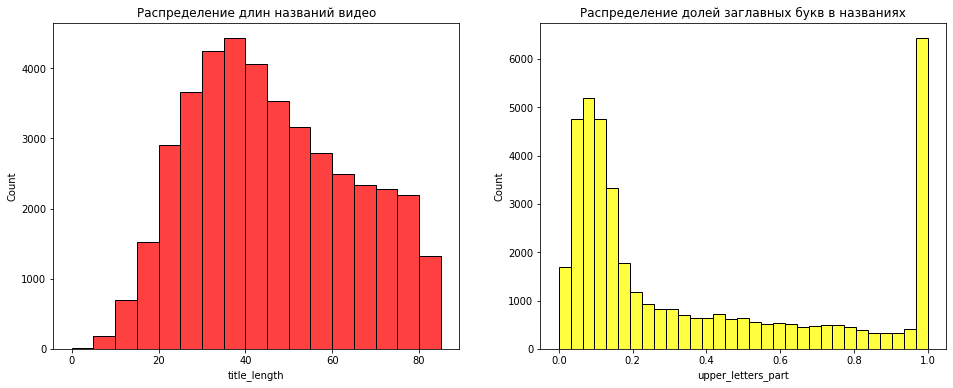

In [221]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ru_data = ru[ru['is_russian']=='yes']
bins = np.arange(0, ru_data['title_length'].max()+1, 5)
ax1 = sns.histplot(ru_data['title_length'], ax=ax1, color='r', bins=bins)
ax1.set_title('Распределение длин названий видео')

ax2 = sns.histplot(ru_data['upper_letters_part'], ax=ax2, color='yellow')
ax2.set_title('Распределение долей заглавных букв в названиях');


Чаще всего встречаются видео с длиной названий около 30-40 символов, а наиболее частые доли заглавных букв - около 0,1, или же все название целиком заглавное.

### Топ каналов и видео

In [222]:
# Топ 20 самых часто встречающихся в трендах каналов

top_20_channels = ru.groupby('channelTitle', as_index=False)\
    .size().sort_values(by='size', ascending=False).reset_index(drop=True)[:20]

In [223]:
# Датафрейм с данными о видеороликах 20 самых популярных каналов

top_20_channels_df = ru.loc[ru['channelTitle'].isin(top_20_channels.index)]

In [224]:
# Категории, которые соответствуют видеороликам 20 самых популярных каналов

l = []
for i in top_20_channels['channelTitle']:
    l.append(list(ru[ru['channelTitle']==i]['category'].unique()))

In [225]:
# Каждый канал снимает ролики одной категории

len(l)==len(top_20_channels)

True

In [226]:
categories = []
for i in l:
    i = ', '.join(i)
    categories.append(i)

In [227]:
# Некоторая информация о самых популярных каналах

top_20_channels = pd.concat([top_20_channels, pd.Series(categories)], axis=1).rename(columns={'size':'video_counts', 0:'category'})
top_20_channels

,channelTitle,video_counts,category
0,Телеканал Дождь,710,News & Politics
1,Россия 24,647,"Entertainment, News & Politics"
2,Матч ТВ,564,Sports
3,Анатолий Шарий,529,Comedy
4,Соловьёв LIVE,431,News & Politics
5,Эхо Москвы,296,News & Politics
6,НТВ,278,"Entertainment, People & Blogs, Film & Animatio..."
7,Вести FM,264,News & Politics
8,Россия 1,258,"Entertainment, Film & Animation, News & Politics"
9,Ozodivideo,257,"Entertainment, News & Politics"


Чаще всего в трендах ютуба бывают ролики новостных и политических каналов, а также развлекательные ролики.

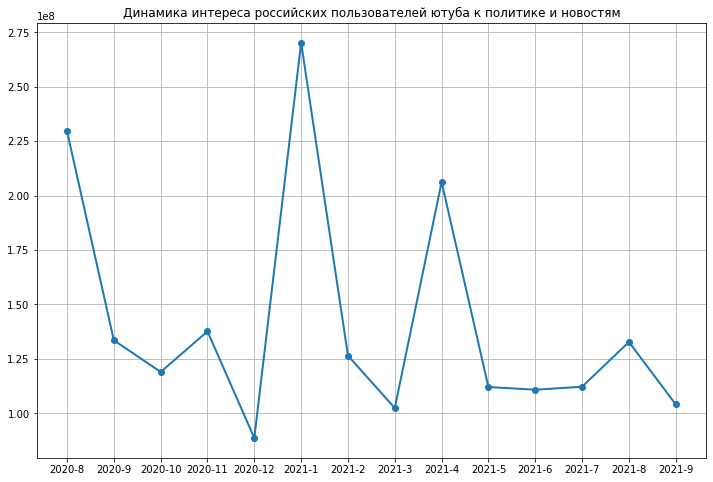

In [228]:
news_politics_views = ru[ru['category']=='News & Politics'].groupby(['year', 'month'], as_index=False)['view_count'].sum()
news_politics_views['year_month'] = news_politics_views['year'].astype(str) + '-' + news_politics_views['month'].astype(str)

plt.plot(news_politics_views['year_month'][:-1], news_politics_views['view_count'][:-1], marker='o', lw=2)
plt.grid(True)
plt.title('Динамика интереса российских пользователей ютуба к политике и новостям');

На данный момент в России никаких политических событий не происходит, и интерес к этой теме у пользователей низкий. Наибольший интерес к теме политики возникает на фоне протестов (пики приходятся на протесты в Белоруссии, январские митинги и митинг в апреле). В общем-то, это логично.

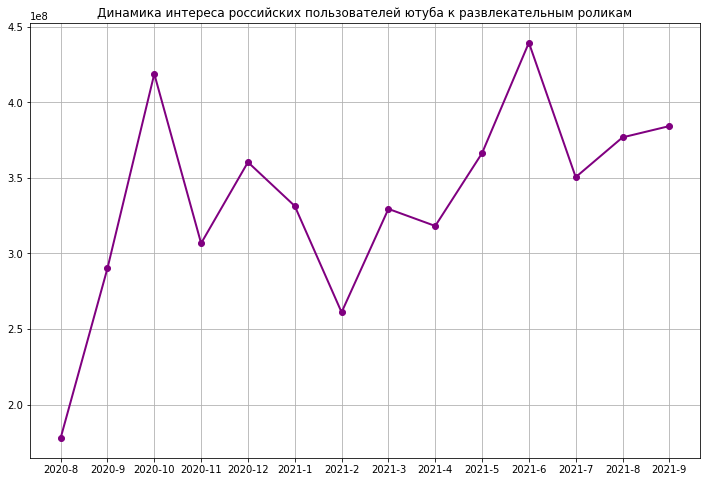

In [229]:
entertainment_views = ru[ru['category']=='Entertainment'].groupby(['year', 'month'], as_index=False)['view_count'].sum()
entertainment_views['year_month'] = entertainment_views['year'].astype(str) + '-' + entertainment_views['month'].astype(str)

plt.plot(entertainment_views['year_month'][:-1], entertainment_views['view_count'][:-1], marker='o', lw=2, color='purple')
plt.grid(True)
plt.title('Динамика интереса российских пользователей ютуба к развлекательным роликам');

Вот это да! В 2021 году люди стали смотреть намного больше развлекательных роликов.

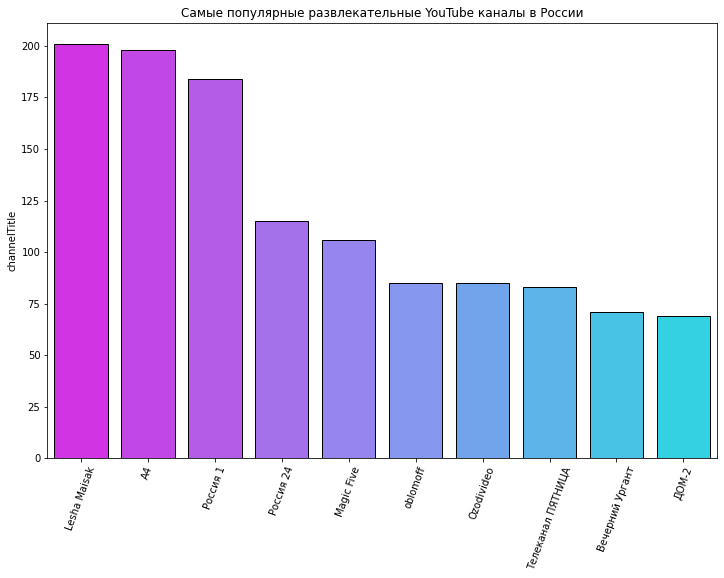

In [230]:
# Нужно узнать, кто снимает самые популярные развлекательные ролики? Влад А4 наверное...

top_entertainment = ru[ru['category']=='Entertainment']['channelTitle'].value_counts()[:10]
sns.barplot(x=top_entertainment.index, y=top_entertainment, ec='k', palette='cool_r')
plt.title('Самые популярные развлекательные YouTube каналы в России')
plt.xticks(rotation=70);

Ну да, естественно это Влад А4. Любопытно, что некоторые телеканалы попадают в этот рейтинг.

In [231]:
ru['category'].unique()

array(['Entertainment', 'People & Blogs', 'Film & Animation',
       'News & Politics', 'Comedy', 'Autos & Vehicles', 'Pets & Animals',
       'Music', 'Sports', 'Science & Technology', 'Gaming',
       'Howto & Style', 'Education', 'Travel & Events'], dtype=object)

In [232]:
# Функция, позволяющая отбирать самые популярные каналы по категории

def top_channels(category, count):
    return ru[ru['category']==category]['channelTitle'].value_counts()[:count]

In [233]:
top_channels('Science & Technology', 10)

Wylsacom              97
SuperCrastan          46
доктор Евдокименко    40
GopherVid             38
Игорь Негода          36
KREOSAN               36
Rozetked              35
808                   35
Ай, Как Просто!       33
Andro News 2          32
Name: channelTitle, dtype: int64

In [234]:
ru.head(3)

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category,like_ratio,view_likes_ratio,likes_activity,comment_activity,month,year,is_russian,title_length,upper_letters,upper_letters_part
0,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**,2020-08-12 09:00:16+00:00,A4,24,2020-08-12 00:00:00+00:00,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**...,5173063,1052986,29927,63557,https://i.ytimg.com/vi/e_Z6upbeYuc/default.jpg,False,False,Новые кроссовки Reebok Classic Leather Legacy ...,Entertainment,0.972,0.204,0.209,0.012,8,2020,yes,35,18,0.514
1,ЕСЛИ ТЫ УВИДИШЬ ПРИЗРАК ДОМА ТО СРАЗУ БЕГИ ! М...,2020-08-12 07:00:15+00:00,АлоЯ Вера,24,2020-08-12 00:00:00+00:00,мистический квест|квест|алоя вера|алое вера|са...,249438,17533,1132,3309,https://i.ytimg.com/vi/szS499UV9kw/default.jpg,False,False,СЛЕДУЮЩЕЕ ВИДЕО - https://youtu.be/9v6lANyHbes...,Entertainment,0.939,0.070,0.075,0.013,8,2020,yes,51,51,1.000
2,Я ВЕРНУЛСЯ В 1й КЛАСС НА ДЕНЬ,2020-08-11 11:14:26+00:00,HiMan,24,2020-08-12 00:00:00+00:00,школа|один день|день|один день в школе|отучилс...,3212662,395568,8817,26083,https://i.ytimg.com/vi/7casLyVjv1I/default.jpg,False,False,Буду рад твоей подписке(мой канал)! ☛ https://...,Entertainment,0.978,0.123,0.126,0.008,8,2020,yes,22,21,0.955


In [235]:
# Топ 5  видео с наибольшим соотношением лайков к дизлайкам в трендах русского ютуба

ru[ru['likes']!=0].sort_values(by='like_ratio', ascending=False)[:5]

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category,like_ratio,view_likes_ratio,likes_activity,comment_activity,month,year,is_russian,title_length,upper_letters,upper_letters_part
65814,Stray Kids 『Scars』 Music Video Unit Teaser (Le...,2021-10-01 14:00:02+00:00,Stray Kids Japan official Youtube,10,2021-10-02 00:00:00+00:00,TWICE|NiziU|SEVENTEEN|JYP|BTS|K-POP,251195,89250,34,3024,https://i.ytimg.com/vi/3DOKpJsR7n4/default.jpg,False,False,■2021年10月13日(水) ReleaseJAPAN 2nd Single『Scars ...,Music,1.000,0.355,0.355,0.012,10,2021,no,52,10,0.192
65841,Stray Kids 『Scars』 Music Video Unit Teaser (Ba...,2021-10-03 14:00:10+00:00,Stray Kids Japan official Youtube,10,2021-10-04 00:00:00+00:00,TWICE|NiziU|SEVENTEEN|JYP|BTS|K-POP,204920,75210,29,1467,https://i.ytimg.com/vi/RYi-EAzumSc/default.jpg,False,False,■2021年10月13日(水) ReleaseJAPAN 2nd Single『Scars ...,Music,1.000,0.367,0.367,0.007,10,2021,no,53,10,0.189
65825,Stray Kids 『Scars』 Music Video Unit Teaser (Hy...,2021-10-02 14:00:17+00:00,Stray Kids Japan official Youtube,10,2021-10-03 00:00:00+00:00,TWICE|NiziU|SEVENTEEN|JYP|BTS|K-POP,235894,84023,38,1740,https://i.ytimg.com/vi/qxM2VuFaevA/default.jpg,False,False,■2021年10月13日(水) ReleaseJAPAN 2nd Single『Scars ...,Music,1.000,0.356,0.356,0.007,10,2021,no,47,11,0.234
59067,"Wow (Lee Know, Hyunjin, Felix)",2020-09-14 09:08:29+00:00,Stray Kids - Topic,10,2020-09-14 00:00:00+00:00,Stray Kids IN LIFE Wow (Lee Know|Hyunjin|Felix),107643,40992,24,2366,https://i.ytimg.com/vi/mQXv864OnXc/default.jpg,False,False,Provided to YouTube by JYP Entertainment Corpo...,Music,0.999,0.381,0.381,0.022,9,2020,no,22,5,0.227
65860,Stray Kids『Scars』Music Video Main Teaser,2021-10-05 14:00:29+00:00,Stray Kids Japan official Youtube,10,2021-10-06 00:00:00+00:00,TWICE|NiziU|SEVENTEEN|JYP|BTS|K-POP,430520,135329,85,4424,https://i.ytimg.com/vi/_lCFeiUp3QQ/default.jpg,False,False,■2021年10月13日(水) ReleaseJAPAN 2nd Single『Scars ...,Music,0.999,0.314,0.315,0.010,10,2021,no,34,7,0.206


Наблюдаются видеоклипы какой-то японской группы. Неужели у них настолько крутая музыка?

In [236]:
# Российские видеоролики с наибольшим соотношением лайков к дизлайкам

ru[(ru['likes']!=0)&(ru['is_russian']=='yes')].sort_values(by='like_ratio', ascending=False)[:5]

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category,like_ratio,view_likes_ratio,likes_activity,comment_activity,month,year,is_russian,title_length,upper_letters,upper_letters_part
58132,Бабка принесла щенка УСПЫЛЯТЬ! ЧТО!? (Не кликб...,2021-01-10 20:06:00+00:00,Sobaka Fun,15,2021-01-11 00:00:00+00:00,щенок|собака|пес|волонтер|ветеринар|собакафан|...,50363,11064,14,2002,https://i.ytimg.com/vi/ricRWcrAx1s/default.jpg,False,False,Одни малыши умирают на улице от холода и болез...,Pets & Animals,0.999,0.220,0.220,0.040,1,2021,yes,39,13,0.333
58381,Я не УЗНАЛ щенка! Подмена? Ветеринар меняет по...,2021-07-16 15:09:56+00:00,Sobaka Fun,15,2021-07-17 00:00:00+00:00,щенок|пес|собака|дворняга|волонтер|собакафан|s...,39940,8726,12,1136,https://i.ytimg.com/vi/MrX27VPR41U/default.jpg,False,False,Два щенка из Сибири уехали в Финляндию и зажил...,Pets & Animals,0.999,0.218,0.219,0.028,7,2021,yes,38,8,0.211
28249,Позитивные мысли и намерения. Александр Палиенко.,2021-09-20 04:00:30+00:00,Александр Палиенко,22,2021-09-20 00:00:00+00:00,Палиенко|Александр Палиенко|эзотерика|тренинги...,32306,5812,8,228,https://i.ytimg.com/vi/tHl7Uns9qaQ/default.jpg,False,False,«Позитивные мысли и намерения» – фрагмент запи...,People & Blogs,0.999,0.180,0.180,0.007,9,2021,yes,42,3,0.071
27089,ГОРЯЧИЙ МОЛОЧНЫЙ ПИРОГ или Пирог на Горячем Мо...,2021-08-14 18:09:10+00:00,Ольга Шобутинская,22,2021-08-15 00:00:00+00:00,ПИРОГ|ГОРЯЧИЙ МОЛОЧНЫЙ ПИРОГ|ПИРОГ НА ГОРЯЧЕМ ...,51369,6525,9,287,https://i.ytimg.com/vi/v3mgBAshL20/default.jpg,False,False,Знаменитый горячий молочный пирог (Hot Milk Ca...,People & Blogs,0.999,0.127,0.127,0.006,8,2021,yes,54,26,0.481
58485,Щенок выжил это чудо! Мы УДИВЛЕНЫ каким он стал!,2021-09-30 09:36:35+00:00,Sobaka Fun,15,2021-10-01 00:00:00+00:00,щенок|спасение|собакафан|sobakafun|собака|пес|...,47144,9194,13,1106,https://i.ytimg.com/vi/gw7MjqHWSSI/default.jpg,False,False,Малыш Лаки живой! Достаточно быстро нашли щенк...,Pets & Animals,0.999,0.195,0.195,0.023,9,2021,yes,38,10,0.263


Видимо, многим заходят ролики про щенков. Ну да, как щенкам можно лайк не поставить? 

In [237]:
# Топ 5  видео с наименьшим соотношением лайков к дизлайкам в трендах русского ютуба

ru[ru['likes']!=0].sort_values(by='like_ratio', ascending=True)[:5]

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category,like_ratio,view_likes_ratio,likes_activity,comment_activity,month,year,is_russian,title_length,upper_letters,upper_letters_part
4432,Amber Heard's 2020 Takeaway: 'Adapt & Survive',2020-12-15 04:54:59+00:00,Access,24,2020-12-23 00:00:00+00:00,Access|amber heard|the stand|tv|celebrity|inte...,507439,667,89993,27598,https://i.ytimg.com/vi/uretrfMA-Io/default.jpg,False,False,Amber Heard is reflecting on the lessons of 20...,Entertainment,0.007,0.001,0.179,0.054,12,2020,no,31,5,0.161
295,Cuties | Official Trailer | Netflix,2020-08-18 14:00:00+00:00,Netflix,24,2020-08-21 00:00:00+00:00,Cuties|Mignonnes|Netflix|NetflixFilm|Dance|Mai...,2656692,16014,471525,63899,https://i.ytimg.com/vi/M0O7lLe4SmA/default.jpg,False,False,"Amy, 11 years old, tries to escape family dysf...",Entertainment,0.033,0.006,0.184,0.024,8,2020,no,28,4,0.143
39113,Курал Чокоев уят сөз менен сөгүнгөн көрсөтүүсү...,2021-01-09 16:31:32+00:00,Эркин Маалымат,25,2021-01-11 00:00:00+00:00,[None],63724,250,2932,2073,https://i.ytimg.com/vi/95Kv1aHKFoU/default.jpg,False,False,#Эркин_МаалыматКыргыз Республикасынын эмгек си...,News & Politics,0.079,0.004,0.050,0.033,1,2021,no,71,3,0.042
44097,Пресс-конференция главного тренера сборной Рос...,2021-07-02 11:47:23+00:00,RT на русском,25,2021-07-03 00:00:00+00:00,rt|новости рт|рт на русском|раша тудей|russia ...,49255,368,3100,1276,https://i.ytimg.com/vi/ktXi7ugZNr8/default.jpg,False,False,Прямая трансляция. Главный тренер сборной Росс...,News & Politics,0.106,0.007,0.070,0.026,7,2021,yes,76,8,0.105
41946,Путин о ценах на продукты,2021-04-21 11:02:09+00:00,РИА Новости,25,2021-04-22 00:00:00+00:00,путин|цены|послание,165033,1041,7805,1549,https://i.ytimg.com/vi/XyijTbMh1Wc/default.jpg,False,False,Не надо здесь тень на плетень наводить и всех ...,News & Politics,0.118,0.006,0.054,0.009,4,2021,yes,21,1,0.048


In [238]:
# Российские видеоролики с наибольшим соотношением лайков к дизлайкам

ru[(ru['likes']!=0)&(ru['is_russian']=='yes')].sort_values(by='like_ratio')[:5]

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category,like_ratio,view_likes_ratio,likes_activity,comment_activity,month,year,is_russian,title_length,upper_letters,upper_letters_part
44097,Пресс-конференция главного тренера сборной Рос...,2021-07-02 11:47:23+00:00,RT на русском,25,2021-07-03 00:00:00+00:00,rt|новости рт|рт на русском|раша тудей|russia ...,49255,368,3100,1276,https://i.ytimg.com/vi/ktXi7ugZNr8/default.jpg,False,False,Прямая трансляция. Главный тренер сборной Росс...,News & Politics,0.106,0.007,0.070,0.026,7,2021,yes,76,8,0.105
41946,Путин о ценах на продукты,2021-04-21 11:02:09+00:00,РИА Новости,25,2021-04-22 00:00:00+00:00,путин|цены|послание,165033,1041,7805,1549,https://i.ytimg.com/vi/XyijTbMh1Wc/default.jpg,False,False,Не надо здесь тень на плетень наводить и всех ...,News & Politics,0.118,0.006,0.054,0.009,4,2021,yes,21,1,0.048
13526,ДИСС на МИШЕЛЬ КЕННЕЛИ и ЛИЗУ ВАСИЛЕНКО / DZHA...,2021-09-23 09:00:11+00:00,Даша Джакели,24,2021-09-24 00:00:00+00:00,Даша Джакели|мишель кеннели|michelle kennelly|...,74912,1751,10726,1672,https://i.ytimg.com/vi/mE9sEN2by9I/default.jpg,False,False,Я Даша Джакели решила сделать дисс на Мишель К...,Entertainment,0.140,0.023,0.167,0.022,9,2021,yes,46,38,0.826
64512,Ольга Бузова #Shorts,2021-07-17 07:33:53+00:00,Ольга Бузова,10,2021-07-18 00:00:00+00:00,Ольга Бузова #Shorts|Бузова Шорт|бузова шортс|...,28812,238,1301,205,https://i.ytimg.com/vi/mDObh2x7LuI/default.jpg,False,False,Ольга Бузова #Shorts,Music,0.155,0.008,0.053,0.007,7,2021,yes,17,3,0.176
46192,Глава ЦИК о ходе голосования на выборах в Госд...,2021-09-19 22:33:29+00:00,RT на русском,25,2021-09-20 00:00:00+00:00,rt|новости рт|рт на русском|раша тудей|russia ...,74595,792,3991,967,https://i.ytimg.com/vi/tPgbHRLhqRw/default.jpg,False,False,ЦИК подводит предварительные итоги выборов в Г...,News & Politics,0.166,0.011,0.064,0.013,9,2021,yes,45,9,0.200


Комментарии излишни.

In [239]:
# Скрипт для извлечения слов из названий видео 

words=[]
titles = [t.split() for t in ru['title']]
for i in titles:
    for c in i:
        c = c.lower()
        if c.isalpha()==True:
            words.append(c)

In [240]:
len(words)

322480

In [241]:
print(words[:20])

['побег', 'из', 'картонной', 'тюрьмы', 'челлендж', 'если', 'ты', 'увидишь', 'призрак', 'дома', 'то', 'сразу', 'беги', 'мистический', 'квест', 'я', 'вернулся', 'в', 'класс', 'на']


In [242]:
# with open('Ru_YouTube_title_words.txt', 'w', encoding='utf-8') as f:
#     for item in words:
#         f.write(item + "\n")

### Облако слов

Облако слов имеет следующий вид
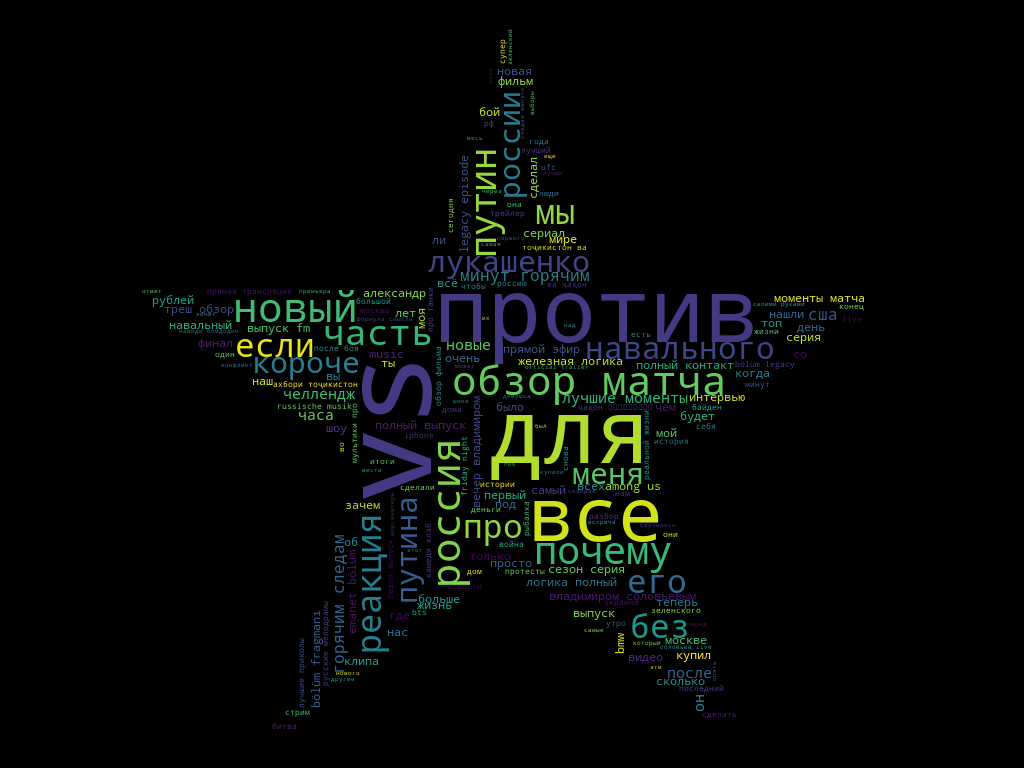

Многие популярные слова имеют отношение к политике. Также заметно, что очень часто встречается слово "против" и "vs", что одно и то же. Похоже, зрителям трендов нравятся различного рода противоборства, а таже матчи, вероятно, футбольные.

In [243]:
# Можно разбить столбец с тегами и посмотреть, какие самые популярные

In [244]:
l = list(ru['tags'].apply(lambda x: x.split(sep='|')))

In [245]:
tags = []
for i in l:
    for j in i:        
        tags.append(j)
print(tags[:20])

['Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**', 'Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж 2 часть', 'Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж', 'Побег Из КАРТОННОЙ ТЮРЬМЫ', 'Побег Из ТЮРЬМЫ', 'Картонная тюрьма', 'тюрьма', 'побег', 'побег из тюрьмы челлендж', 'картонная тюрьма', 'картонный лабиринт', 'картон', 'картонный', 'а4 тюрьма', 'а4 картонная тюрьма', 'а4 картон', 'Челлендж', 'Влад Бумага', 'Влад А4', 'А4']


In [246]:
len(tags)

974040

In [247]:
# Использование методов numpy позволило сократить время вычислений в сотни и возможно тысячи раз по сравнению с циклом!

tags_array = np.asarray(tags)
unique, counts = np.unique(tags_array, return_counts=True)
tags_dict = dict(zip(unique, counts))

In [299]:
# Создаем датафрейм с данными о тегах

tags_df = pd.DataFrame.from_dict(tags_dict, orient='index')\
        .rename(columns={0:'count'})\
        .sort_values(by='count', ascending=False).reset_index()[1:21]
tags_df['index'] = tags_df['index'].apply(lambda x: x.title())

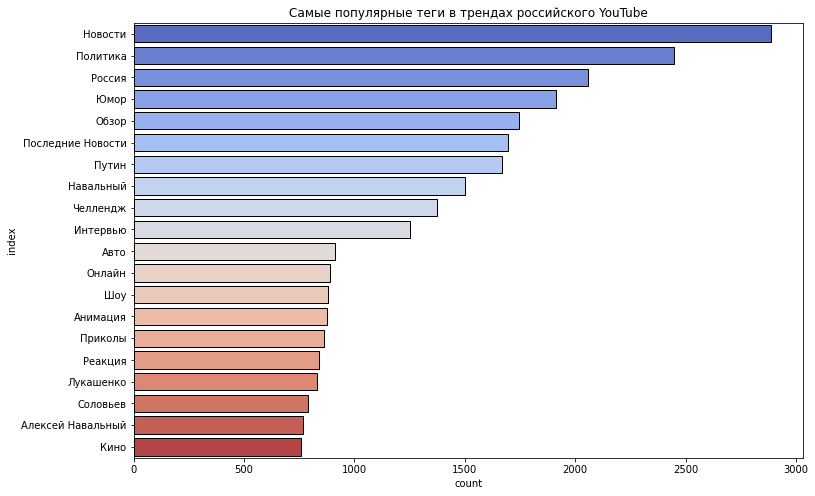

In [300]:
sns.barplot(data=tags_df, x='count', y='index', palette='coolwarm', ec='k')
plt.title('Самые популярные теги в трендах российского YouTube');